# Create EDA plots for 2011-2016 data

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn visualization package
import pandas as pd
import time
import re # Regex
import collections

# File reading things
import pickle
import json
import csv
import datetime # For handling dates

# The "requests" library makes working with HTTP requests easier
import requests
import os
from bs4 import BeautifulSoup
from IPython.display import Image, display # Display image from URL
from IPython.core.display import HTML # Display image from URL

# TMDB API wrapper
import tmdbsimple as tmdb

# IMDB access
import imdb

# Display options
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline

In [27]:
# # My API key (Lexi)
# tmdb.API_KEY = 'ee0df3ce88063f7f6cd466ff61266a55'

# # Load data from 2012- 2016
# movies_data = pd.read_csv('all_movies_from_2011_2016_data.csv')
# movies_data.shape
# print movies_data.head(4)
            

In [119]:
# data_2011_16 = pd.read_csv('combined_data_2011to2016_onehot_genres.csv', header = 0)
# data_2011_16 = pd.read_csv('combined_data_2011to2016_onehot_genres.csv')

# Troubleshooting:
# http://stackoverflow.com/questions/33998740/error-in-reading-a-csv-file-in-pandascparsererror-error-tokenizing-data-c-err
with open('combined_data_2011to2016_onehot_genres.csv', 'rb') as f:
    reader = csv.reader(f)

    linenumber = 1
    try:
        for row in reader:
            linenumber += 1
    except Exception as e:
        print (("Error line %d: %s %s" % (linenumber, str(type(e)), e.message)))
            

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: BaseException.message has been deprecated as of Python 2.6


Error line 0: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 1: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 2: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 3: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 4: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 5: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 6: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 7: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 8: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 9: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error line 10: <type 'exceptions.TypeError'> can only concatenate list (not "int") to list
Error lin

In [9]:
# Lexi Loading Cell
os.chdir('/Users/AlexandraDing/Documents/cs109b-best-group/Full_Dataset')

data_2011_16 = pickle.load(open('combined_data_2011to2016_onehot_genres.p', 'rb'))
# data_2011_16 = pd.read_csv('combined_data_2011to2016_onehot_genres.csv')


one_hot_encode_genres = data_2011_16[data_2011_16.columns[-19:-1]]
one_hot_encode_genres.columns

# Load genre dictionary
genre_dict_by_id = pickle.load(open('/Users/AlexandraDing/Desktop/cs109b-best-group/Milestone1/genre_dict_by_id.p', 'rb'))

# Convert keys to int
genre_dict_by_id = {int(k):v for k,v in genre_dict_by_id.items()}
# print genre_dict_by_id

n_unique_genres = len(genre_dict_by_id)
list_unique_genres = genre_dict_by_id.values()

print (data_2011_16.head(3))
# type(data_2011_16)

                        poster_path                                         title release_date                                           overview  popularity                                original_title                     backdrop_path  vote_count  video  adult  vote_average original_language     id      genre_ids   12   14   16   18   27   28   35   36   37   53   80   99  878  9648  10402  10749  10751  10752  10770
0  /wNUDAq5OUMOtxMlz64YaCp7gZma.jpg   Pirates of the Caribbean: On Stranger Tides   2011-05-14  Captain Jack Sparrow crosses paths with a woma...    7.912175   Pirates of the Caribbean: On Stranger Tides  /l7zANdjgTvYqwZUx76Vk0EKpCH5.jpg        3699  False  False           6.3                en   1865   [12, 28, 14]  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0
1  /fTplI1NCSuEDP4ITLcTps739fcC.jpg  Harry Potter and the Deathly Hallows: Part 2   2011-07-07  Harry, Ron and Hermione continue their quest t...    7.6

In [10]:
# Convert release_date column to datetime object
data_2011_16['release_date'] = pd.to_datetime(data_2011_16['release_date'], format = '%Y-%m-%d' )
# data_2011_16['release_date']

In [11]:
print one_hot_encode_genres.head(3)

one_hot_encode_genres.columns


   12     14     16     18     27     28     35     36     37     53     80     99     878    9648   10402  10749  10751  10752
0    1.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
1    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
2    1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0


Index([12, 14, 16, 18, 27, 28, 35, 36, 37, 53, 80, 99, 878, 9648, 10402, 10749, 10751, 10752], dtype='object')

In [12]:
### Count genres

# N genres per entry
print np.sum(one_hot_encode_genres.values, 1)
print 'Average number of genres a movie belongs to:', np.mean(np.sum(one_hot_encode_genres.values, 1))

# N movies per genre
print np.sum(one_hot_encode_genres.values, 0)

print one_hot_encode_genres.columns

[ 3.  2.  3. ...,  1.  1.  1.]
Average number of genres a movie belongs to: 1.6159701177
[ 1151.   994.  1719.  8842.  3604.  2355.  5889.   567.   146.  3478.
  1228.  7635.  1556.   948.  1914.  2115.  1417.   300.]
Index([12, 14, 16, 18, 27, 28, 35, 36, 37, 53, 80, 99, 878, 9648, 10402, 10749, 10751, 10752], dtype='object')


In [13]:
# one_hot_encode_genres.values


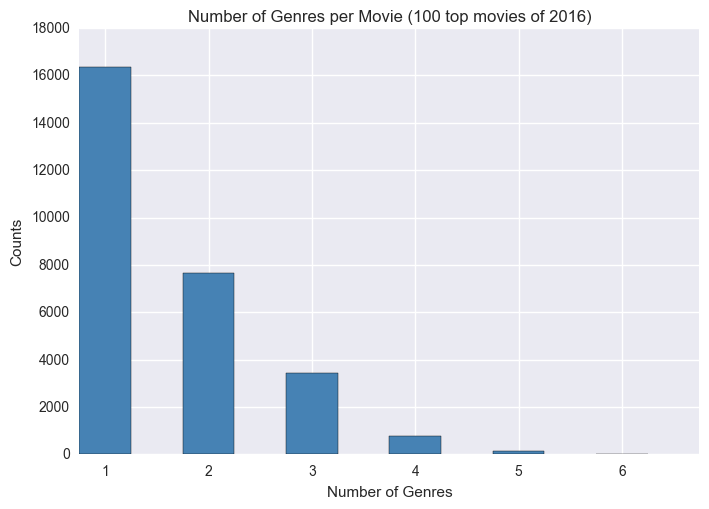

In [14]:
# Create barplot of n genres per movie
hist_genre_count = collections.Counter(np.sum(one_hot_encode_genres.values, 1) )
A = hist_genre_count.values()
B = map(int, hist_genre_count.keys())
# print A
# print B

sns.set_context({"figure.figsize": (24, 10)})
sns.set(font_scale=1)

fig, ax = plt.subplots()
bar_width = 0.5
ax.bar(B, A, bar_width, color = 'steelblue')
ax.set_xticks(np.array(B) + bar_width/2)
ax.set_xticklabels(B)
plt.ylabel("Counts")
plt.xlabel("Number of Genres")
plt.title("Number of Genres per Movie (100 top movies of 2016)")

In [102]:
# [genre_dict_by_id[int(one_hot_encode_genres.columns[i])] for i in range(len(one_hot_encode_genres.columns))]
# M = [genre_dict_by_id[int(one_hot_encode_genres.columns[i])] for i in range(len(one_hot_encode_genres.columns))]
# print M
print one_hot_encode_genres.columns
print genre_dict_by_id

# Delete column 10769 (Foreign)- 

Index([12, 14, 16, 18, 27, 28, 35, 36, 37, 53, 80, 99, 878, 9648, 10402, 10749, 10751, 10752, 10770], dtype='object')
{10752: u'War', 80: u'Crime', 10402: u'Music', 35: u'Comedy', 36: u'History', 37: u'Western', 53: u'Thriller', 9648: u'Mystery', 12: u'Adventure', 10770: u'TV Movie', 14: u'Fantasy', 16: u'Animation', 18: u'Drama', 99: u'Documentary', 878: u'Science Fiction', 27: u'Horror', 28: u'Action', 10749: u'Romance', 10751: u'Family'}


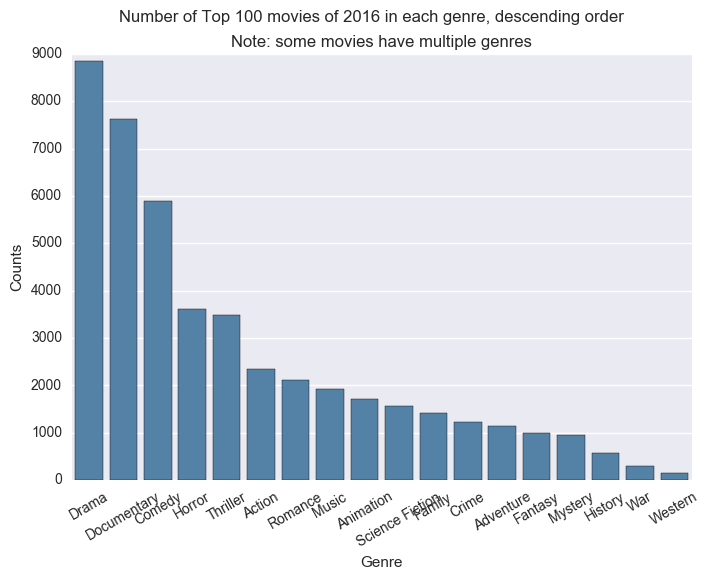

In [15]:

genre_names_encoded = [genre_dict_by_id[int(one_hot_encode_genres.columns[i])] for i in range(len(one_hot_encode_genres.columns))]
genre_counts_df = pd.DataFrame({'genre' :genre_names_encoded, 'counts': np.sum(one_hot_encode_genres.values, 0)})

genre_counts_df_sorted = genre_counts_df.sort_values('counts', ascending = False)

sns.set_context({"figure.figsize": (24, 10)})
sns.set(font_scale=1)
plt.plot()
sns.barplot(x = genre_counts_df_sorted['genre'], 
            y = genre_counts_df_sorted['counts'],
           color = 'steelblue')
plt.xticks(rotation=30)
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.suptitle('Number of Top 100 movies of 2016 in each genre, descending order')
plt.title('Note: some movies have multiple genres')

## Generate Correlation Matrix

In [107]:
#load data
# os.chdir('/Users/Cynthia9109/Documents/Harvard_Stat/Spring_2017/STAT121B/Project/cs109b-best-group-master')
#data with encoded genres
# movie_encoded = pd.read_csv("top_100_2016_onehot_genres.csv")

#subset encoded genre information 
genre = data_2011_16.iloc[:, -20:-1]

#change columns labels to string
map(int, genre.columns)
genre.columns = map(int, genre.columns)

#change title names to reflect genre
# read the genre list
genre_names = pd.read_csv("genre_list.csv")
# conver the dataframe into a dictionary
genre_names = genre_names.set_index("id")
genre_name_dict = genre_names.to_dict()['GenreName']

# match genre name to the id (using the genre dictionary from above)
genre = genre.rename(columns = genre_name_dict)

IOError: File genre_list.csv does not exist

In [ ]:
# Compute matrix of correlation coefficients
corrmat = genre.corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.set(font_scale=1.5)
sns.heatmap(corrmat, vmax=1, square=True)
ax.invert_yaxis()
ax.set_title('Heatmap of correlation matrix')

f.tight_layout()
plt.show()

In [ ]:
#create zero mtrix
n = genre.shape[1]
countmat = np.zeros(shape=(n,n))

#create a count matrix
for i in range(n):
    for j in range(n):
        #count for the number of movies with both labels
        countmat[i,j] = sum(genre[[i]].values * genre[[j]].values)

#convert the matrix to a dataframe  
countmat_df = pd.DataFrame(data = countmat, index = corrmat.index, columns = corrmat.columns)

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(countmat_df, vmax= 30, square=True, cmap = "Blues")
ax.invert_yaxis()
ax.set_title('Heatmap of Count matrix')

f.tight_layout()
plt.show()